In [1]:
import networkx as nx
import numpy as np
import random
import itertools

seed = 1005
np.random.seed(seed)
random.seed(seed)

In [103]:
from networkx.generators.random_graphs import extended_barabasi_albert_graph
from networkx.algorithms.community.kernighan_lin import kernighan_lin_bisection

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

reds = cm.get_cmap('Reds')
sns.set(rc={'figure.figsize':(11.7,8.27)})

### The classroom

We first generate a random classroom of $n$ individuals based on the Barabási–Albert model.

In [126]:
class Classroom:
    def __init__(self, n, m, p, q):
        self.G =  extended_barabasi_albert_graph(n, m, p, q)
        self.layout = nx.spring_layout(self.G)
        
    @property
    def eigen(self):
        return list(nx.eigenvector_centrality(self.G).values())
    
    @property
    def utility(self):
        return sum(degree for node, degree in self.G.degree)
    
    @property
    def partition(self):
        return kernighan_lin_bisection(self.G)
    
        
    def draw(self, ax, **kwargs):

        vmin = min(c.eigen)/3
        vmax = max(c.eigen)    
            
        nx.draw(
            self.G, self.layout,
            node_color=c.eigen, vmin = vmin, vmax = vmax, cmap = reds,
            ax = ax,
            **kwargs)
        
        return ax
    
    def draw_subgraphs(self, A, B, ax):
        
        AG = self.G.subgraph(A)
        BG = self.G.subgraph(B)
        
        nx.draw(AG, self.layout, node_color="r", ax = ax)
        nx.draw(BG, self.layout, node_color="b", ax = ax)
        
        return ax
        

In [152]:
c = Classroom(100, 2, 0.2, 0.5)

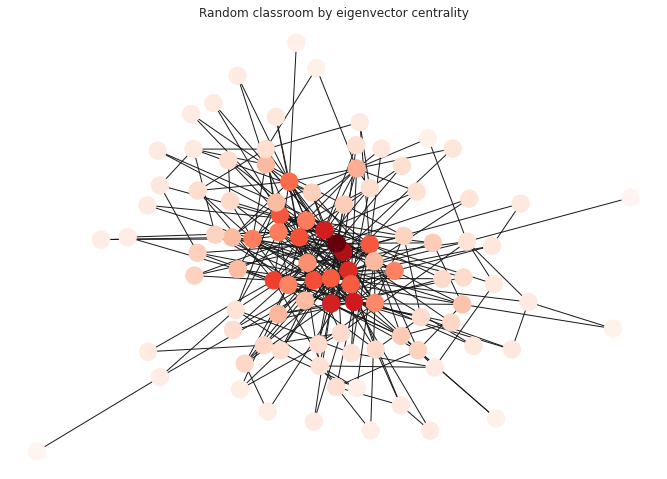

In [153]:
fig, ax = plt.subplots()
c.draw(ax)
ax.set_title("Random classroom by eigenvector centrality")
fig.show()

### Partition

We want to find the partition that minimizes the number of edges between classes. 

In [154]:
A, B = c.partition

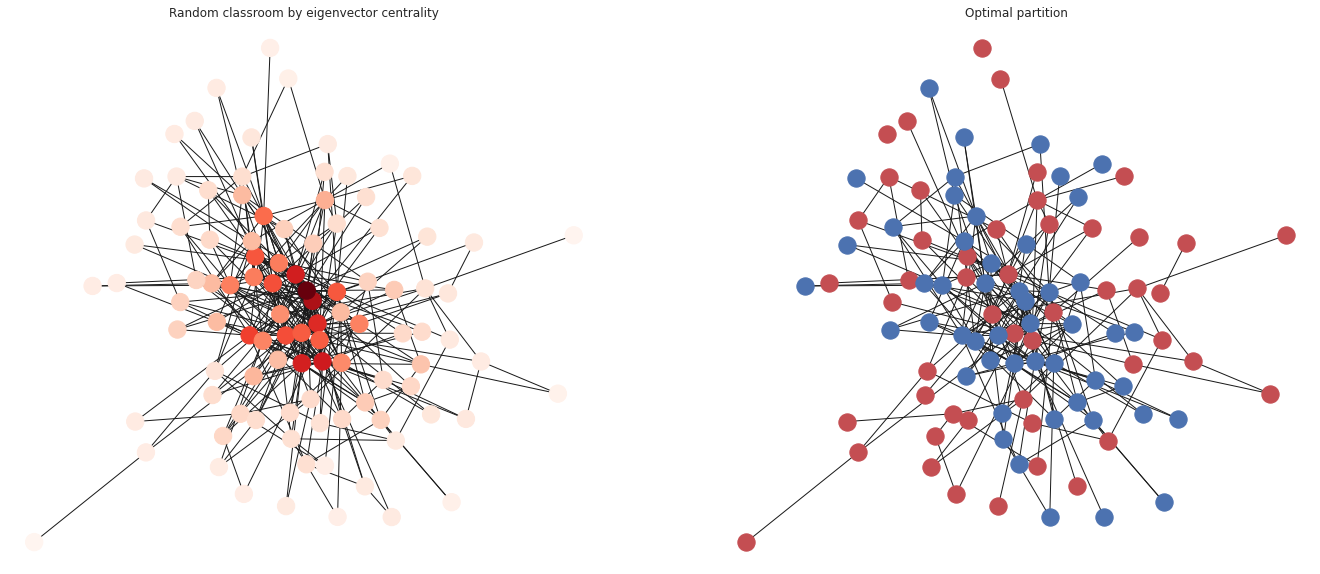

In [155]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (11.7 * 2, 10))


c.draw(ax1)
c.draw_subgraphs(A, B, ax2)

ax1.set_title("Random classroom by eigenvector centrality")
ax2.set_title("Optimal partition")

fig.show()

### A smaller class

In [158]:
c = Classroom(4, 1, 0.2, 0.5)
A, B = c.partition

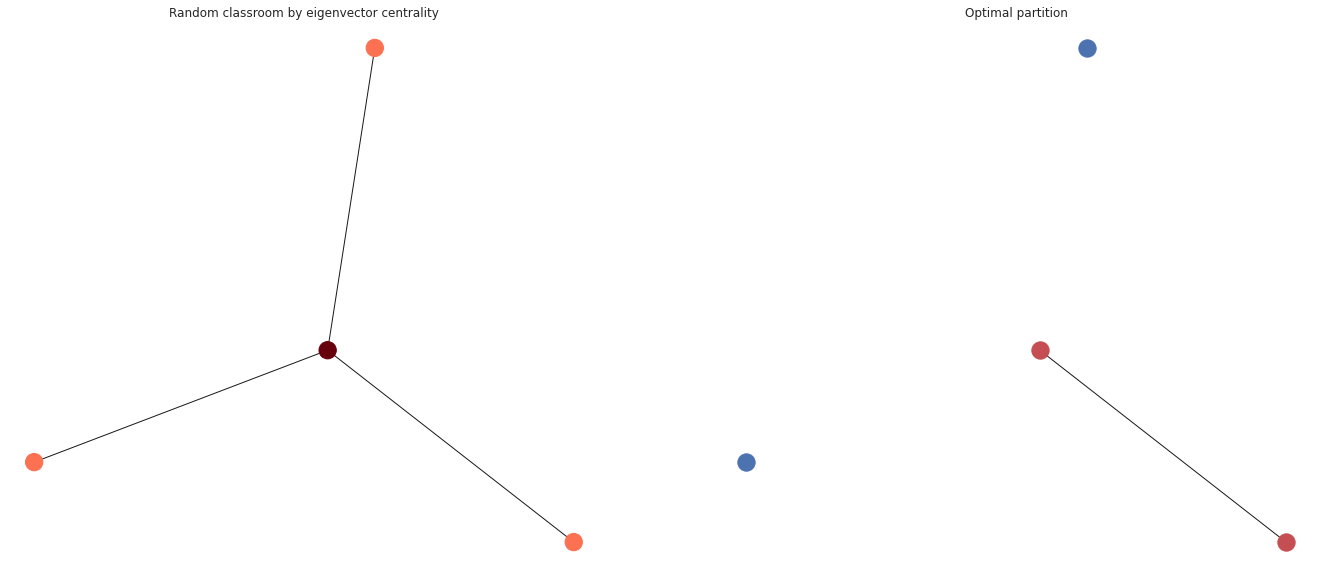

In [159]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (11.7 * 2, 10))


c.draw(ax1)
c.draw_subgraphs(A, B, ax2)

ax1.set_title("Random classroom by eigenvector centrality")
ax2.set_title("Optimal partition")

fig.show()